In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import skrf as rf
from IPython.display import Image, display
from scipy.optimize import curve_fit
prop_cycle = rcParams['axes.prop_cycle']   
colors = prop_cycle.by_key()['color']
import scipy.constants as sc

In [2]:
path_fig="..//Figures/" 

Nous allons simuler le circuit de mesure d'un transmon couplé à une cavité (circuit ci-dessous) 

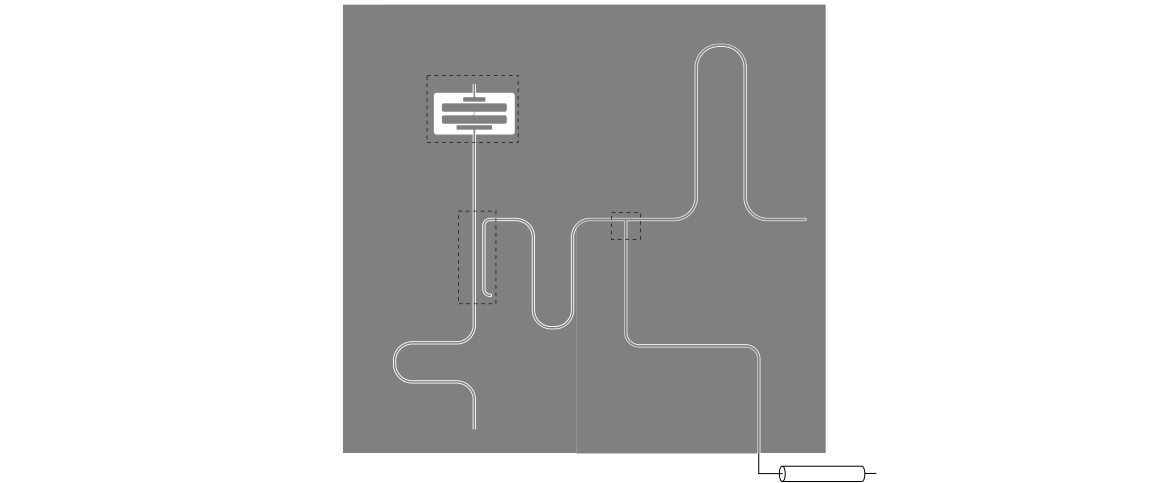

In [3]:
Image(filename=path_fig+"Transmon_6GHz.png")

# Ligne de transmission CPW

Le circuit (mis à part la jonction Josephson) est réalisé à l’aide d’une couche mince de tantale, caractérisée par une température critique $T_c \simeq 4.4\,\mathrm{K}$ et une inductance cinétique $L_k = 0.2\,\mathrm{pH/sq}$, déposée sur un substrat de saphir d’épaisseur $500\,\mu\mathrm{m}$ (utiliser le *general loss model* pour créer un nouveau métal).

Simuler la ligne CPW ($w = 17\,\mu\mathrm{m}$, $g = 10\,\mu\mathrm{m}$) et en déduire son impédance caractéristique ainsi que la vitesse de propagation du signal. L’ensemble des simulations se feront entre 3 et 7 GHz.


# Coupler / Connection 

Importer le design du coupleur et de la connexion en T (fichiers `Qubit_coupler.GDS` et `Qubit_T_connection.GDS`).

Simuler ces circuits en tantale sur saphir dans la bande $\left[3\,\mathrm{GHz},\,7\,\mathrm{GHz}\right]$ avec une *cell size* de $2.5\,\mu\mathrm{m} \times 2.5\,\mu\mathrm{m}$. Il faudra bien repérer les numéros de ports associés au schéma.


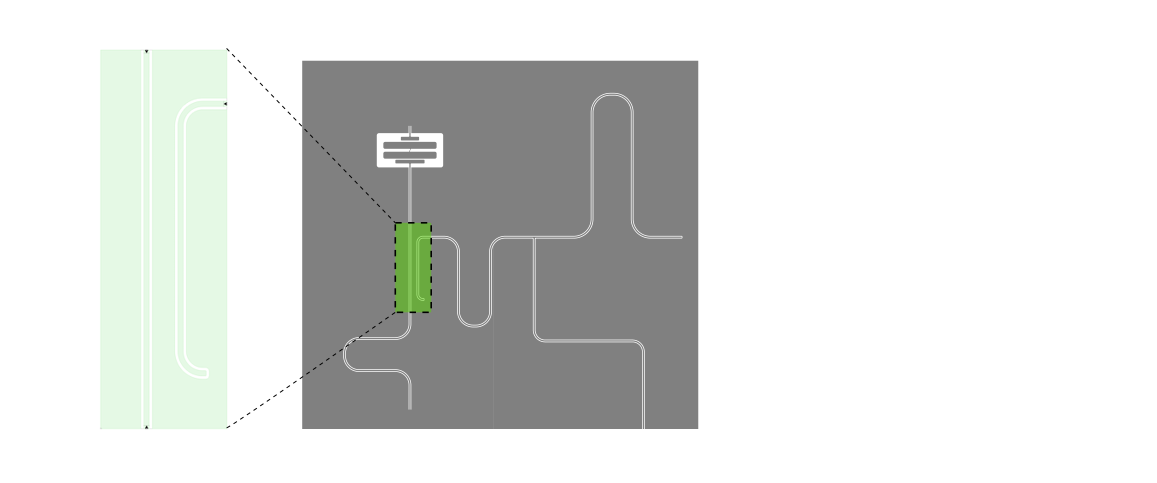

In [4]:
Image(filename=path_fig+"Transmon_coupler.png")

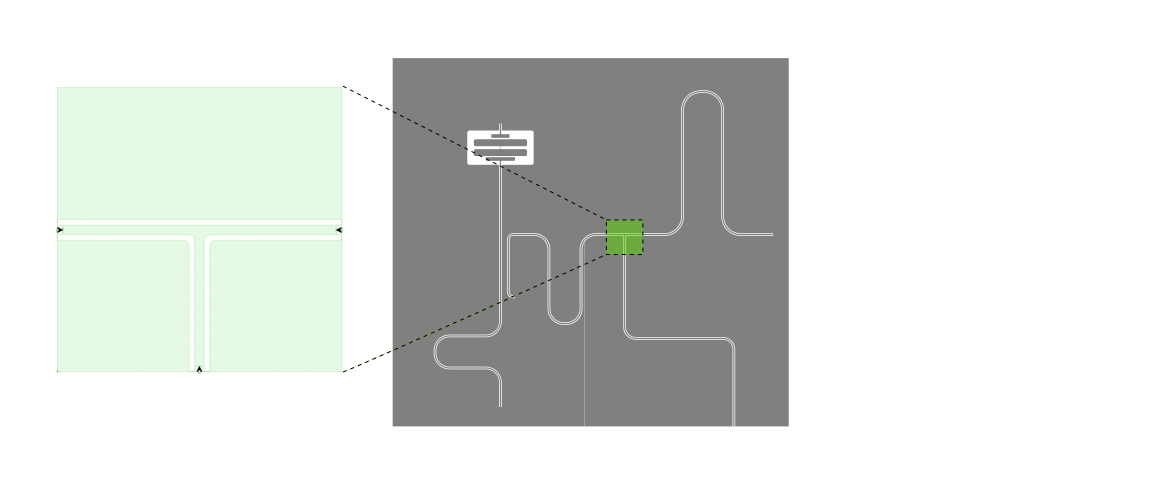

In [5]:
Image(filename=path_fig+"Transmon_T.png")

# Qubit couplé capacitivement

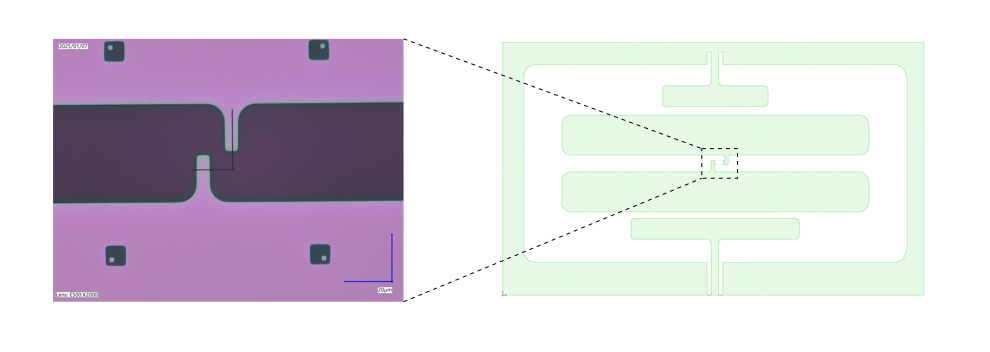

In [6]:
Image(filename=path_fig+"Qubit_junction.png")

- importer le design de la capacité du transmon ("Qubit_junction.GDS"),
- calculer la capacité du transmon en utilisant des ports balancés,
- déduire de la valeur de la capacité C, l'inductance $L_g$ que doit avoir la jonction Josephson pour de la fréquence du qubit soit $f_q=3.87 \, \mathrm{GHz}$,
- déduire des questions précédentes la valeur de l'énergie de charge $E_c$ et de l'énergie Josephson $E_J$. On va modéliser l'état excité du qubit par une inductance $L_e$ telle que $\frac{\hbar}{L_eC}=\sqrt{8E_cE_J}-E_c$. Calculer $L_e$,
- Simuler la réflexion $S_{11}$ au niveau de la capacité connectée au résonanteur de lecture pour les deux valeurs de $L_g$ et $L_e$ (fichiers "Qubit_junction_self_param1.s1p" et  "Qubit_junction_self_param2.s1p" )
- créer les structures skrf correspondantes "Qubit_g" et "Qubit_e"

# Simulation du réseau avec skrf

- vérifier que vous avez bien crée les structures shrf suivantes: "coupler", "T_conn", "Qubit_g" et "Qubit_e",
- [interpoler les fréquences](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.networkSet.NetworkSet.interpolate_frequency.html) de l'ensemble de ces structures,
- définir les longueurs des 5 CPWs du réseau: "L_coupler_Qubit", "L_coupler_res_end", "L_T_Purcell", "L_coupler_T" et"L_T_feed",
- créer des lignes de transmission skrf définies par une longueur $L$, une impédance caractéristique $z0$ et une vitesse de propagation $c$ en vous aidant de l'exemple ci-dessous:

In [ ]:
s = np.zeros((Nf, 2, 2), dtype=complex)
s[:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L)
s[:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_Qubit)
CPW= Network(frequency=freq, s=s_coupler_Qubit, z0=50, name='CPW_a_b')

- créer 2 [ports](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.Port.html), un [ground](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.Ground.html) et un [open](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.Open.html), 
- créer [connexions](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.connections_list.html) simulant le qubit dans les états $|0\rangle$ et  $|1\rangle$

# Effet du filtre

- créer une connexion en remplaçant le qubit par un 2ème port,
- observer ce que "voit" le qubit en mesurant $S_{21}$ ([il faut intéroger le circuit pour savoir où sont connectés les ports](https://scikit-rf.readthedocs.io/en/latest/api/generated/skrf.circuit.Circuit.port_indexes.html) 1 et 2)